# Logistic model for uptake of solar and wind energy

## How long will it take for fossil fuels to be replaced? 

This notebook presents an over-simplified way to make an estimate of how long it might take to phase out fossil fuels and illustrates how a logistic growth might be applied to the uptake of solar and wind energy.

## What will replace fossil fuels?
Let's start by looking at trends over the last half century to get some insight into what might eventually be possible. We will use the same data file (downloaded from https://ourworldindata.org/energy).

Multipliers are applied to fossil fuels, because there is a mismatch between how fossil and non-fossil fuels are handled in the statistics (*Segers 2008, Energy Policy 36: 3243-3248*), particularly with regard to electricity output (recorded for nuclear, hydro, etc.) versus heat input (fossil fuels). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dataDir = '../DATA/energy-consumption/'
filename = dataDir + 'global-primary-energy.csv'
energyType = ['Coal','Solar','Oil','Gas','Traditional biofuels',
              'Other renewables','Hydro','Nuclear','Wind']
iSolar = 1
iWind = 8

# factors, substitution method of Segers 2008, Energy Policy 36, 3243-3248
energyFactor = [0.4, 1, 0.4, 0.4, 1, 1, 1, 1, 1]

year = np.genfromtxt(filename,delimiter=',',skip_header=1,usecols=(2,))
energy =np.genfromtxt(filename,delimiter=',',skip_header=1,usecols=range(3,12))

energy = energyFactor * energy
energyTotal = np.sum(energy, axis=1)
# need to transpose arrays before division - done by rows
# .T and .transpose() do the same thing
proportion = 100 * (energy.T/energyTotal.T).transpose()

We plot data over what we think is a useful timeframe and look for trends.

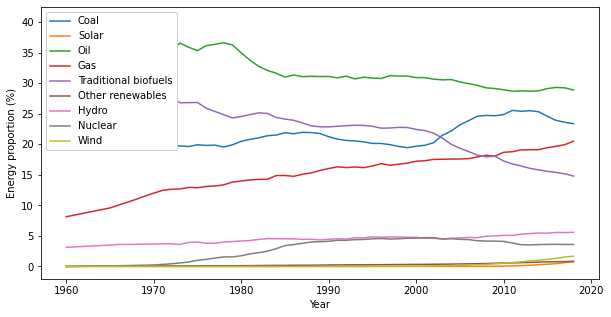

In [2]:
plt.figure(figsize=[10,5])

yearSelection = (year >= 1960)
for i in range(9):
    plt.plot(year[yearSelection], proportion[yearSelection,i], 
             label=energyType[i])

plt.legend(loc='upper left',facecolor='white',framealpha=1.0)
plt.xlabel('Year')
plt.ylabel('Energy proportion (%)')
plt.show()

## So where are we heading? 

The sum of nuclear and hydro has been stable for the last 30 years on about 10%. Traditional biofuels and other renewables are steadily dropping (mainly reflecting larger total demand) and maybe they will stabilize at about 10%, though that depends on total energy demand - we will assume they do for now. Let's also assume that the remaining 80% will eventually be made up of solar and wind, which is a good combination, because winter weather is often windy when the sun doesn't shine. Lets guess the final mix to be 50:30 solar:wind (a lot of people live in sunny places). The exact numbers can certainly be estimated in much better ways, but let's go with this for now. If all this is about right then how long will the energy transition take?

##  How quickly are we changing?
To answer this question, we note that the total uptake of solar and wind is still very small, so we can approximate growth with an exponential model.

\begin{equation}  \frac{dN}{dt} = k N  \end{equation} 

\begin{equation}  \frac{d(\ln N)}{dt} = k  \end{equation} 

We can find the growth factor, $k$ by looking at the gradient of $\ln N$ plotted against $t$.

C:\Users\sutherru\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


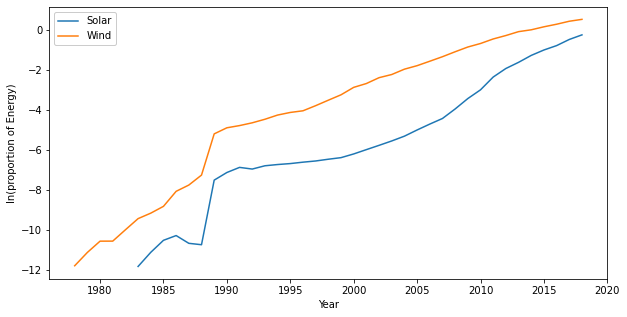

In [3]:
logProportion = np.log(proportion)

plt.figure(figsize=[10,5])

yearSelection = (year >= 1960)
for i in (iSolar,iWind):
    plt.plot(year[yearSelection], logProportion[yearSelection,i], 
             label=energyType[i])

plt.legend(loc='upper left',facecolor='white',framealpha=1.0)
plt.xlabel('Year')
plt.ylabel('ln(proportion of Energy)')
plt.show()

We see that the gradients of the lines are reasonably constant, though we choose to discard data from before 2000, because it seems that solar technology has a more constant increase after then. We find a growth factor $k$ by determining the gradient of each line.

In [4]:
yearSelection = (year >= 2000)

# polyfit returns the gradient and intercept: element[0] is gradient
kSolar=np.polyfit(year[yearSelection],logProportion[yearSelection,iSolar],1)[0]
kWind =np.polyfit(year[yearSelection],logProportion[yearSelection,iWind],1)[0]

print('Growth factor, Solar =',kSolar,'; Growth factor, Wind =',kWind,', year on year proportional increase.')

Growth factor, Solar = 0.3631998705205597 ; Growth factor, Wind = 0.1951724632195794 , year on year proportional increase.


## A model for the transition to solar and wind power
We know historical growth rates, current states (year 2018), and we have made an informed guess at final states: we can plot the logistic functions for each to model how transition will occur.

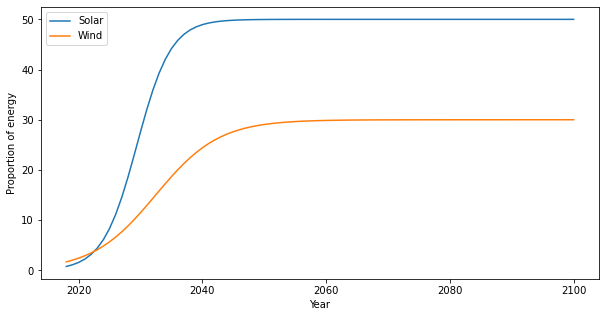

2018 values. Wind = 1.6906308922038138 %. Solar = 0.7782924236648834 %


In [5]:
def logisticGrowthAnalytic(k,P,N0,t):
    '''
    Given the growth rate (k), carrying capacity (P), and initial population
    value (N0), generate an array of population (N) at various times (t), 
    based on analytical solution of the logistic growth equation. 
    Assumes k and P are not functions of t or N.

    Parameters
    ----------
    k : float
        Growth rate parameter.
    P : float
        Carrying capacity.
    N0 : float
        Initial population value (t=0).
    t : ndarray
        Time array.

    Returns
    -------
    N : ndarray
        Population value at time t

    '''
    return P / (1 + ((P-N0)/N0)*np.exp(-k*t))

t = np.arange(0,83)

Nsolar = logisticGrowthAnalytic(kSolar,50,proportion[-1,iSolar],t)

Nwind = logisticGrowthAnalytic(kWind,30,proportion[-1,iWind],t)

plt.figure(figsize=[10,5])
plt.plot(t+2018,Nsolar,label='Solar')
plt.plot(t+2018,Nwind,label='Wind')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Proportion of energy')
plt.show()

print('2018 values. Wind =',proportion[-1,iWind],'%. Solar =',proportion[-1,iSolar],'%')

We see that although the starting point is low, the growth rates are predicted to lead to profound change over the next 20 years! However, might we run into hard barriers as we try to build this new future? Will we have sufficient earth materials available to us?